### **EXPPLORING THE DATASET**

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#Mounting the google drive and reading the dataset
#If there are any values from the missing_values in the dataset will be replace with NULL values
missing_values = ["n.a.", "NA", "n/a", "na"]
df = pd.read_csv('/content/drive/MyDrive/heart_2020.csv', na_values= missing_values)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


From the above dataframe we can see that HeartDisease, Smoking, AlcoholDrinking, Stroke, Diffwalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer are the categorical varaiables where we need to encode them to numeric. For Yes or No we can replace with 1 and 0. For more categories we can either do one-hot encoding or replace with different range of values.

In [ ]:
#Shape of the dataset
df.shape

(319795, 18)

In [ ]:
#Knowing the attribute data types
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
#Checking for NULL values in the dataset
#Printing number of null values in each variable
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

We can see there are no NULL values in the above dataset

In [ ]:
#Detailed description of the numeric features
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


We can observe that there is more deviation in BMI, physcialHealth, MentalHealth compared to SleepTime. Later we can standardize the data in data Preprocessing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#Finding the number of uniques values in each variabe
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

From the above we can see all the binary categorical variables which can be replaced by 0 and 1

**Checking Duplicates**

In [ ]:
df.duplicated().sum()

18078

As practically all characteristics are categorical, it is evident that there are duplicate records because it is possible for two records to have the identical values for all features.

**Checking Outliers**

The only column that could have outliers is BMI column, because it's values are ranging from 12-94.8 which is a real range and we can cannot consider outliers on it.

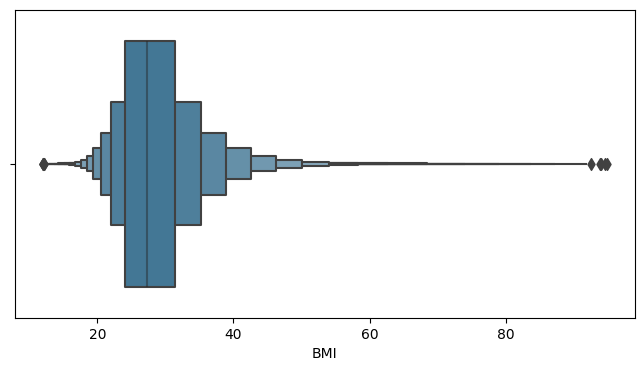

In [ ]:
# Set the figure size
plt.figure(figsize=(8,4))

# Create a boxen plot of the 'BMI' column of the 'df' DataFrame
sns.boxenplot(x=df.BMI, palette='mako')

# Show the plot
plt.show()

**Calculating the probabilities of getting heart disease based on different predictors**

In [ ]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
no_of_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
no_of_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have the Heart disease:', male_with_heart_disease/no_of_male)
print('Probability of Female to have the Heart disease:', female_with_heart_disease/no_of_female)

Probability of Male to have the Heart disease: 0.10618461740904007
Probability of Female to have the Heart disease: 0.06694675367241738


From the above probability calculation we can interpret that the probability of having heart disease is comparitively more high in male than female. It may be due to the lifestyle they choose. Approximately males are 1.6 times more likely to get the heart disease.

In [ ]:
smoking_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
no_of_smoking = len(df[df['Smoking']=='Yes'])
no_smoking_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
no_of_No_smoking = len(df[df['Smoking']=='No'])
print('Probability of smoking people to have Heart disease:', smoking_heart_disease/no_of_smoking)
print('Probability of non smokers to have Heart disease:', no_smoking_heart_disease/no_of_No_smoking)

Probability of smoking people to have Heart disease: 0.12157715983867544
Probability of non smokers to have Heart disease: 0.0603341370078824


From the above probability calculation we can interpret that the probability of having heart disease is comparitively more high in people who smoke than people who don't smoke. Approximately people who smoke is 2 times more likely to get the heart disease.

In [ ]:
AlcoholDrinking_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['AlcoholDrinking']=='Yes')])
no_of_AlcoholDrinking = len(df[df['AlcoholDrinking']=='Yes'])
no_AlcoholDrinking_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['AlcoholDrinking']=='No')])
no_of_No_AlcoholDrinking = len(df[df['AlcoholDrinking']=='No'])
print('Probability of alcohol drinking people to have Heart disease:', AlcoholDrinking_heart_disease/no_of_AlcoholDrinking)
print('Probability of non alcohol drinking to have Heart disease:', no_AlcoholDrinking_heart_disease/no_of_No_AlcoholDrinking)

Probability of alcohol drinking people to have Heart disease: 0.05239472838315654
Probability of non alcohol drinking to have Heart disease: 0.08802152890093887


From the above it's funny that people who are drinking are having less chance of getting heart disease compared to people not drinking which concludes that this is not much useful predictor variable.

In [ ]:
Previous_Stroke_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Stroke']=='Yes')])
Num_of_previous_strokes = len(df[df['Stroke']=='Yes'])
No_Previous_Stroke_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Stroke']=='No')])
Num_of_No_Previous_Strokes = len(df[df['Stroke']=='No'])
print('Probability to have Heart disease for people who already had stroke:', Previous_Stroke_heart_disease/Num_of_previous_strokes)
print('Probability to have Heart disease for people with no previous stroke:', No_Previous_Stroke_heart_disease/Num_of_No_Previous_Strokes)

Probability to have Heart disease for people who already had stroke: 0.3636589609743972
Probability to have Heart disease for people with no previous stroke: 0.07468982146454964


From the above we can interpret that people with previous history of stroke are more prone to have a heart disease.

In [ ]:
# Create a copy of the original DataFrame
temp_df = df.copy()

# Convert the 'Smoking', 'Stroke', 'PhysicalActivity', 'Diabetic', and 'KidneyDisease' columns into binary categorical variables
temp_df.Smoking = temp_df.Smoking.apply(lambda x : 'Smoking' if x == 'Yes' else 'Non Smoking')
temp_df.Stroke = temp_df.Stroke.apply(lambda x : 'Stroke' if x == 'Yes' else 'No Stroke')
temp_df.PhysicalActivity = temp_df.PhysicalActivity.apply(lambda x : 'Activity' if x == 'Yes' else 'No Activity')
temp_df.Diabetic = temp_df.Diabetic.apply(lambda x : 'Diabetic' if x == 'Yes' else 'No Diabetic')
temp_df.KidneyDisease = temp_df.KidneyDisease.apply(lambda x : 'KidneyDisease' if x == 'Yes' else 'No KidneyDisease')

# Create a new 'Combination' column that concatenates the binary variables
temp_df['Combination'] = temp_df.Smoking + ' & ' + temp_df.Stroke + ' & ' + temp_df.PhysicalActivity + ' & ' + temp_df.Diabetic + ' & ' + temp_df.KidneyDisease

# Group the DataFrame by the 'Combination' column and calculate the percentage of 'HeartDisease' for each combination
df1 = temp_df.groupby('Combination')['HeartDisease'].value_counts(normalize = True).mul(100)
df1 = df1.rename('percent').reset_index()

# Extract only the combinations where 'HeartDisease' is 'Yes' and create a new DataFrame 'h'
h = df1[df1['HeartDisease']=='Yes'].drop(['HeartDisease'],axis=1)

# Set the index of DataFrame 'h' to the 'Combination' column
h.set_index('Combination',inplace=True)

# Select only the combinations that have a percentage above a certain threshold
k = h.iloc[[8, 12, 14, 24, 28, 29, 30, 3, 1, 2, 11, 19]]

,percent
Combination,
Non Smoking & Stroke & Activity & Diabetic & KidneyDisease,56.626506
Non Smoking & Stroke & No Activity & Diabetic & KidneyDisease,56.687898
Non Smoking & Stroke & No Activity & No Diabetic & KidneyDisease,52.755906
Smoking & Stroke & Activity & Diabetic & KidneyDisease,58.918919
Smoking & Stroke & No Activity & Diabetic & KidneyDisease,64.197531
Smoking & Stroke & No Activity & Diabetic & No KidneyDisease,53.992395
Smoking & Stroke & No Activity & No Diabetic & KidneyDisease,55.172414
Non Smoking & No Stroke & Activity & No Diabetic & No KidneyDisease,3.519108
Non Smoking & No Stroke & Activity & Diabetic & No KidneyDisease,11.808529


Smoking & Stroke & No Activity & Diabetic & KidneyDisease this combination is having high chance to have a heart disease and Non Smoking & No Stroke & Activity & No Diabetic & No KidneyDisease this combination have low chance of having a heart disease.

### **Visualization Of Categorical Features**

SEX ATTRIBUTE

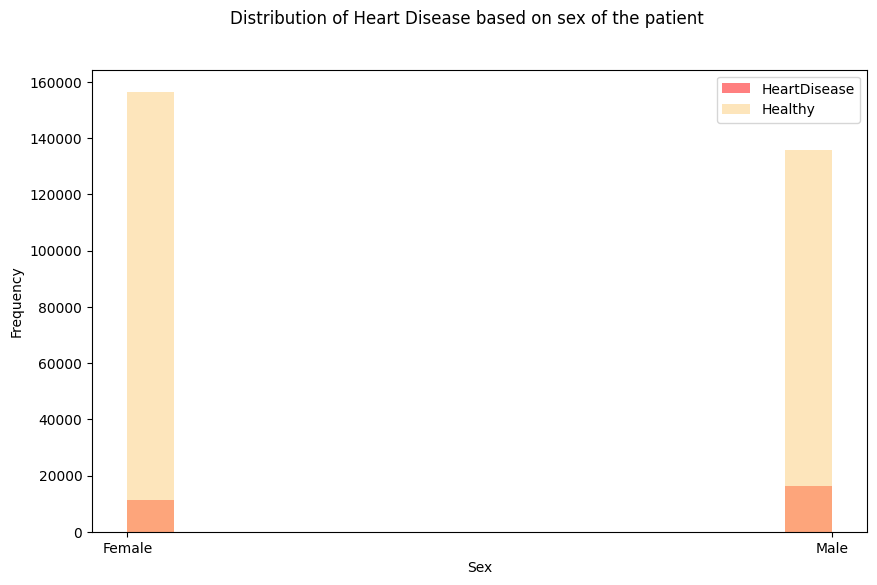

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['Sex'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['Sex'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('Sex')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on sex of the patient')

ax.legend()

Male people are more prone to the heart disease based on there lifestyle

SMOKING ATTRIBUTE

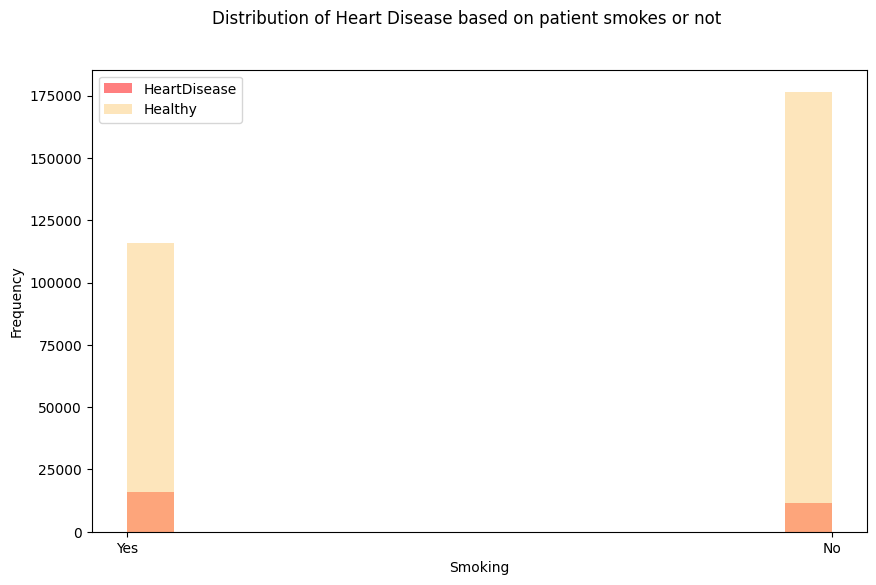

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['Smoking'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['Smoking'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('Smoking')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on patient smokes or not')

ax.legend()

The percentage of people having heart disease is more in smoking people comapared to non-smokers

Alcohol Drinking Attribute

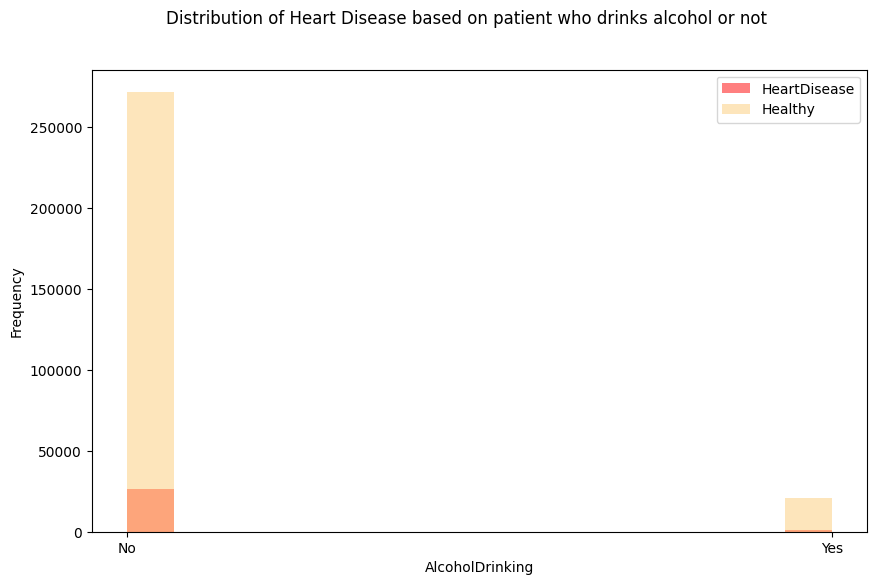

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['AlcoholDrinking'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['AlcoholDrinking'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('AlcoholDrinking')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on patient who drinks alcohol or not')

ax.legend()

Kidney Disease Attribute

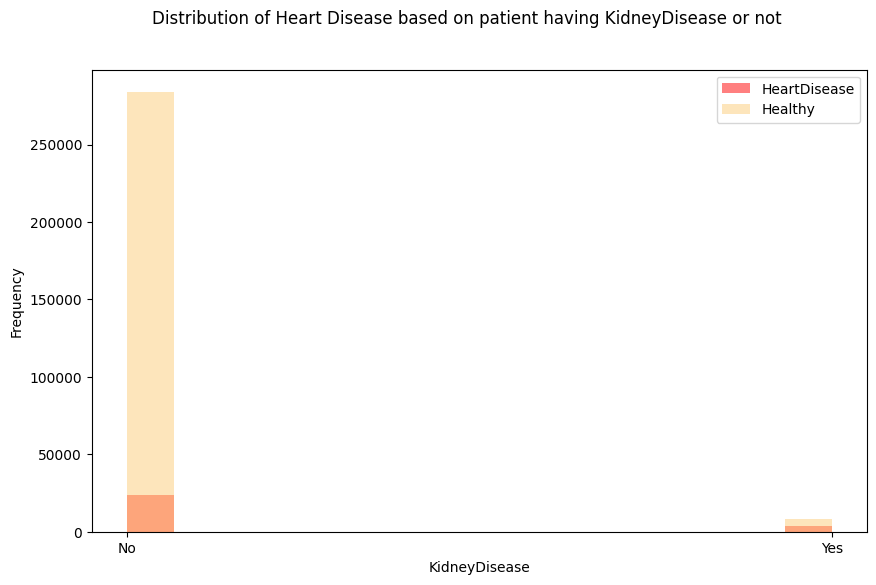

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['KidneyDisease'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['KidneyDisease'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('KidneyDisease')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on patient having KidneyDisease or not')

ax.legend()

The percentage of having heart disease for previously having the kidney disease is high.

Skin cancer Attribute

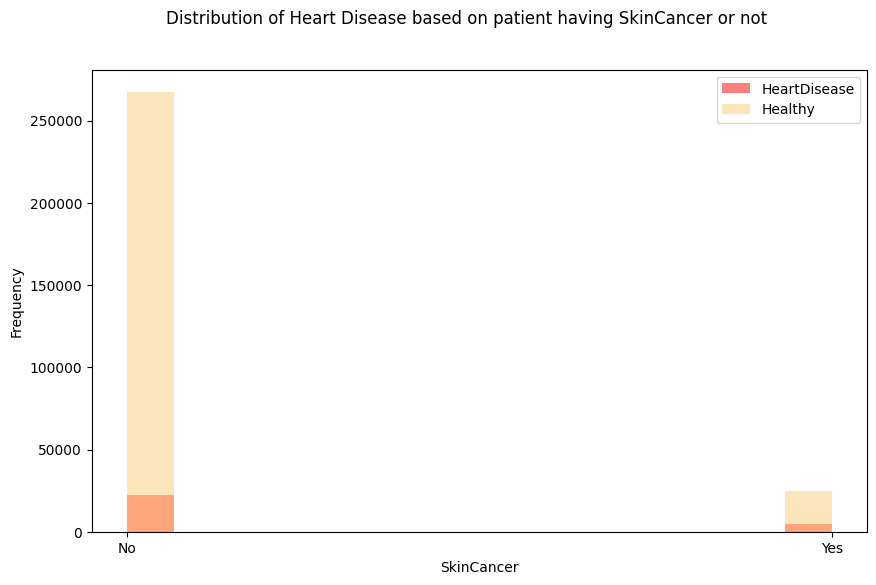

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['SkinCancer'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['SkinCancer'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('SkinCancer')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on patient having SkinCancer or not')

ax.legend()

Stroke Attribute

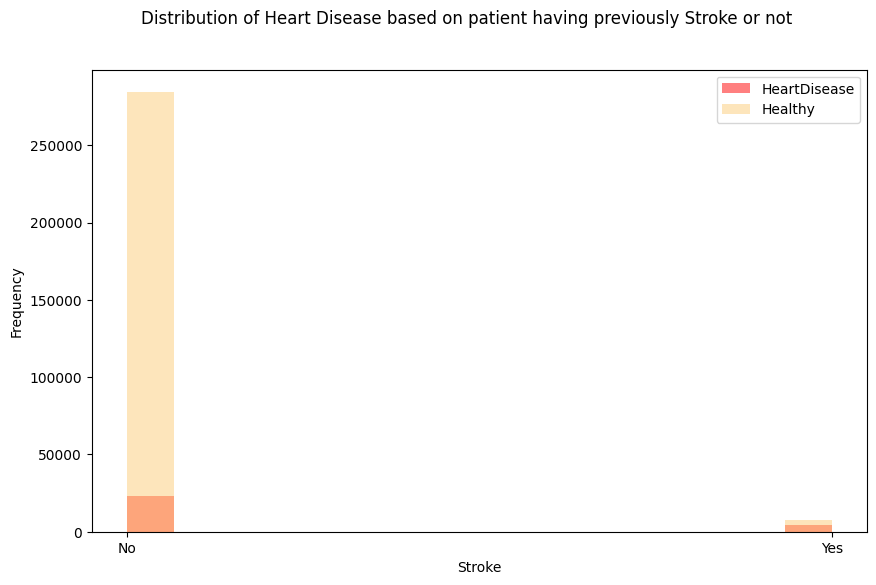

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['Stroke'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['Stroke'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('Stroke')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on patient having previously Stroke or not')

ax.legend()

**DIABETIC ATTRIBUTE**

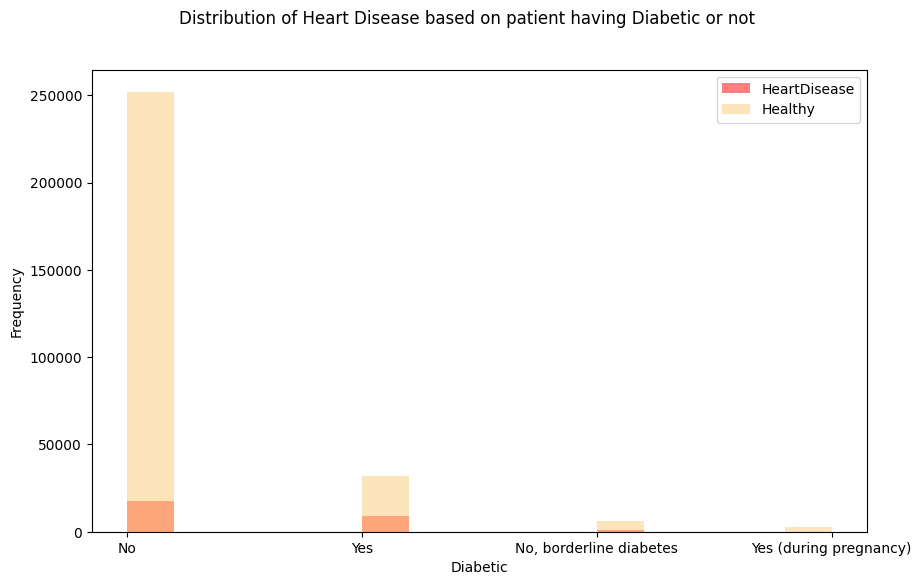

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df['HeartDisease']=='Yes']['Diabetic'], bins = 15, alpha = 0.5, color = 'red', label = 'HeartDisease')
ax.hist(df[df['HeartDisease']=='No']['Diabetic'], bins = 15, alpha = 0.5, color = '#fccc79', label = 'Healthy')

ax.set_xlabel('Diabetic')
ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Heart Disease based on patient having Diabetic or not')

ax.legend()

**RACE ATTRIBUTE**

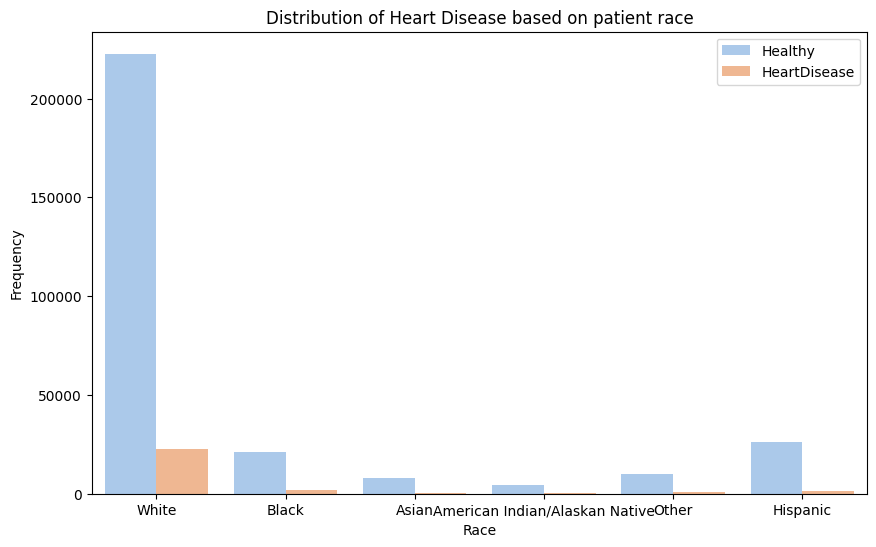

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'pastel')
plt.title('Distribution of Heart Disease based on patient race')
plt.xlabel('Race')
plt.legend(['Healthy','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

From the above countplot we can interpret that the data is biased with more number of white people. So, race attribute doesn't contribute much to the response variable. 

**AGE CATEGORY ATTRIBUTE**

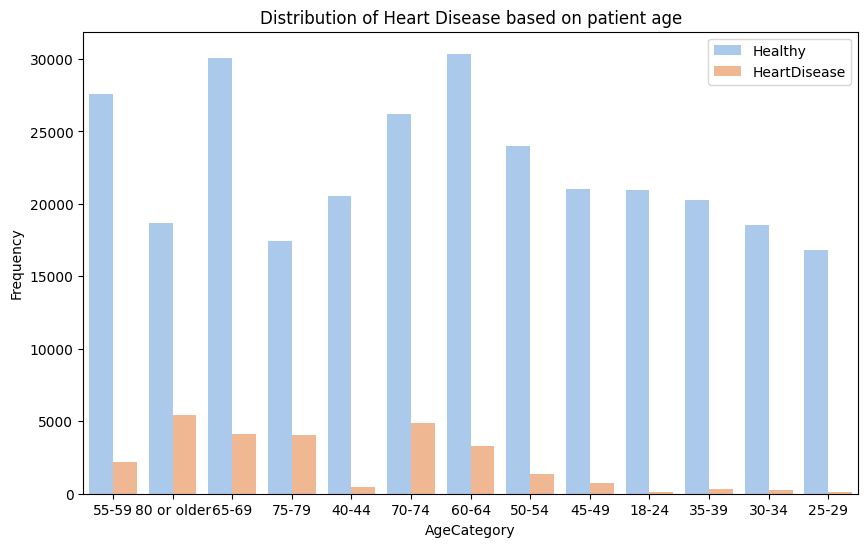

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'pastel')
plt.title('Distribution of Heart Disease based on patient age')
plt.xlabel('AgeCategory')
plt.legend(['Healthy','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

*

In [ ]:
#Here we can change this continuous categorical values to numeric values by replacing it with mean of the category
age_Category= {'18-24':21, '25-29':27, '30-34':32, '35-39':37, '40-44':42, '45-49':47, '50-54':52, '55-59':57, '60-64':62,
             '65-69':67, '70-74':72, '75-79':77, '80 or older':80}
df['AgeCategory'] = df['AgeCategory'].replace(age_Category)

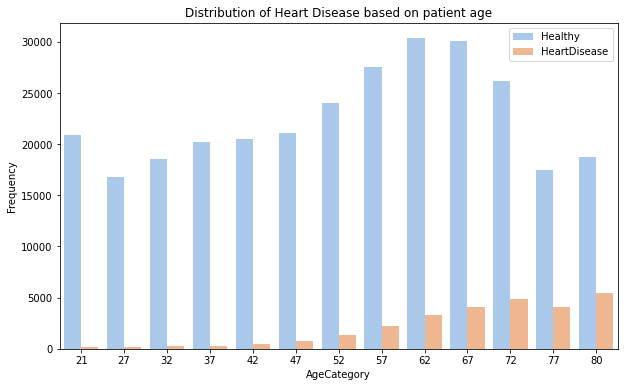

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'pastel')
plt.title('Distribution of Heart Disease based on patient age')
plt.xlabel('AgeCategory')
plt.legend(['Healthy','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

From the above graph we can interpret that number of people with heart diseases is increasing as age of the people increases

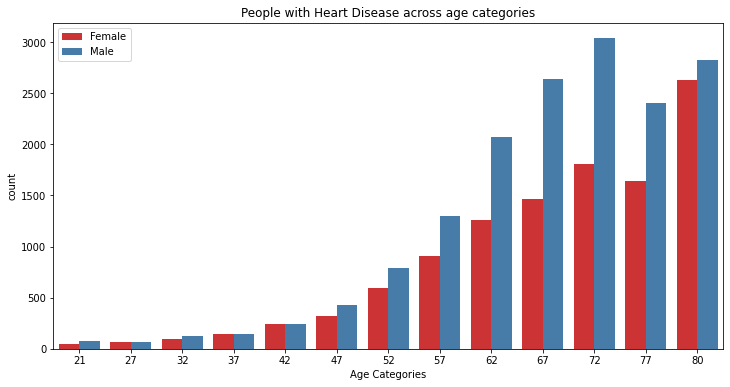

In [ ]:
df.loc[df.AgeCategory=='80 or older','AgeCategory'] = '>80'
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (12,6))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.title('People with Heart Disease across age categories')
plt.xlabel('Age Categories')
plt.legend(['Female','Male'])
plt.show()

In [ ]:
#Replacing all the binary categorical varaiables.
#In diabetic column we are having YES, NO, No, borderline diabetes, Yes (during pregnancy) where the later two are replaces with 0 and 1 respectively
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

Text(0.5, 1.0, 'Correlation Heatmap for the Heart Disease')

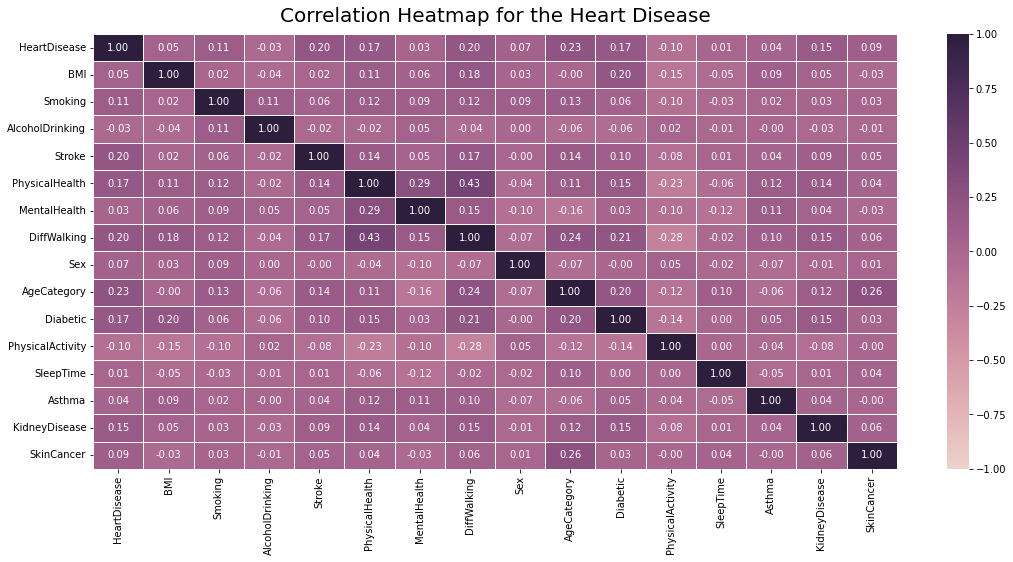

In [ ]:
#correlation heatmap 
correlation = df.corr().round(2)
plt.figure(figsize=(18, 8))
heatmap_vis = sns.heatmap(correlation, linewidths = .8, annot = True, fmt = ".2f", cmap = sns.cubehelix_palette(as_cmap=True), vmin = -1, vmax = 1)
heatmap_vis.set_title('Correlation Heatmap for the Heart Disease', fontdict = {'fontsize': 20}, pad = 12)

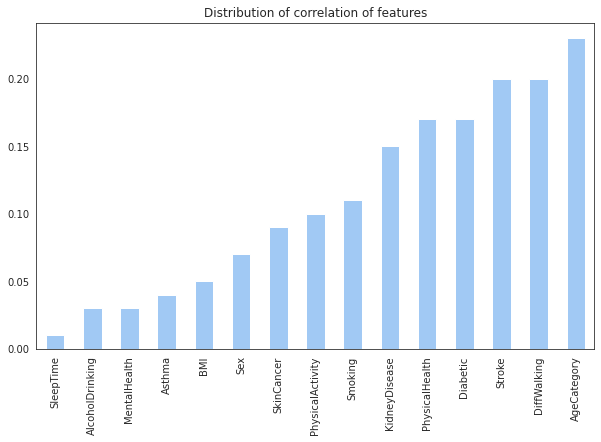

In [ ]:
sns.set_style('white')
sns.set_palette('pastel')
plt.figure(figsize = (10,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.bar()
plt.show()

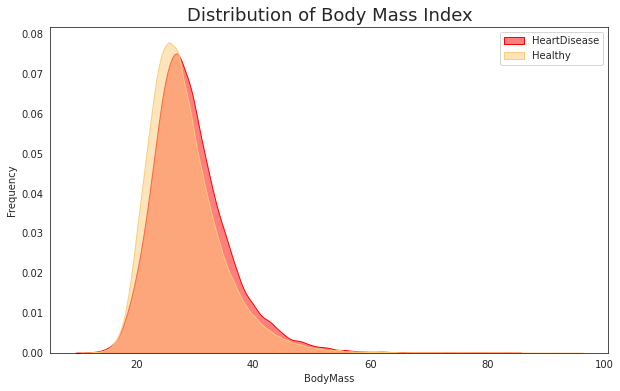

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(df[df['HeartDisease']==1]['BMI'], alpha = 0.5, shade = True, color = 'red', label = 'HeartDisease', ax = ax)
sns.kdeplot(df[df['HeartDisease']==0]['BMI'], alpha = 0.5, shade = True, color = "#fccc79", label = 'Healthy', ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel('BodyMass')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

From the above distribution we can interpret that the people who are healthy are on the lower side of index where as prople who are obese are having heart disease.

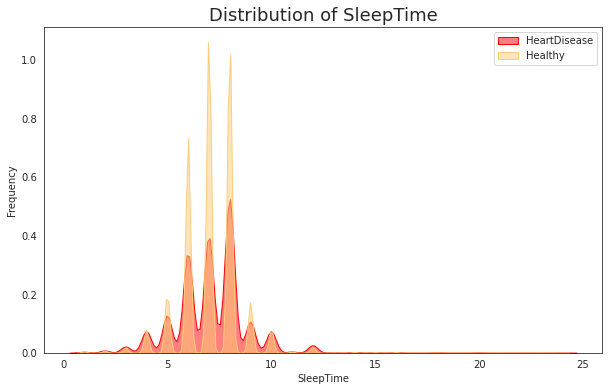

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(df[df['HeartDisease']==1]['SleepTime'], alpha = 0.5, shade = True, color = 'red', label = 'HeartDisease', ax = ax)
sns.kdeplot(df[df['HeartDisease']==0]['SleepTime'], alpha = 0.5, shade = True, color = "#fccc79", label = 'Healthy', ax = ax)
plt.title('Distribution of SleepTime', fontsize = 18)
ax.set_xlabel('SleepTime')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

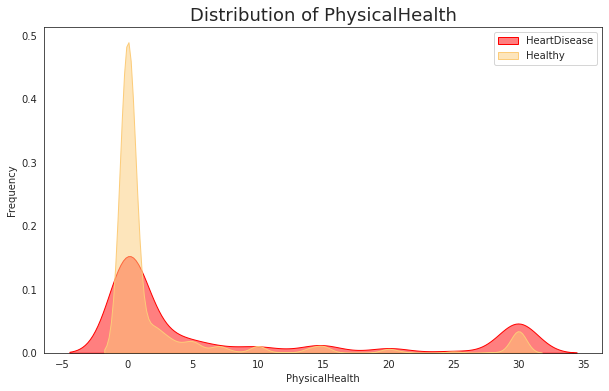

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(df[df['HeartDisease']==1]['PhysicalHealth'], alpha = 0.5, shade = True, color = 'red', label = 'HeartDisease', ax = ax)
sns.kdeplot(df[df['HeartDisease']==0]['PhysicalHealth'], alpha = 0.5, shade = True, color = "#fccc79", label = 'Healthy', ax = ax)
plt.title('Distribution of PhysicalHealth', fontsize = 18)
ax.set_xlabel('PhysicalHealth')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

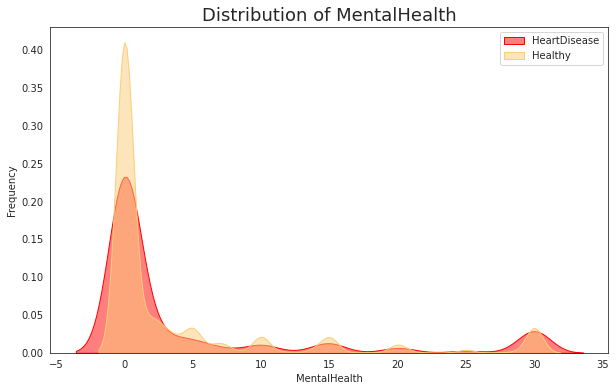

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(df[df['HeartDisease']==1]['MentalHealth'], alpha = 0.5, shade = True, color = 'red', label = 'HeartDisease', ax = ax)
sns.kdeplot(df[df['HeartDisease']==0]['MentalHealth'], alpha = 0.5, shade = True, color = "#fccc79", label = 'Healthy', ax = ax)
plt.title('Distribution of MentalHealth', fontsize = 18)
ax.set_xlabel('MentalHealth')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

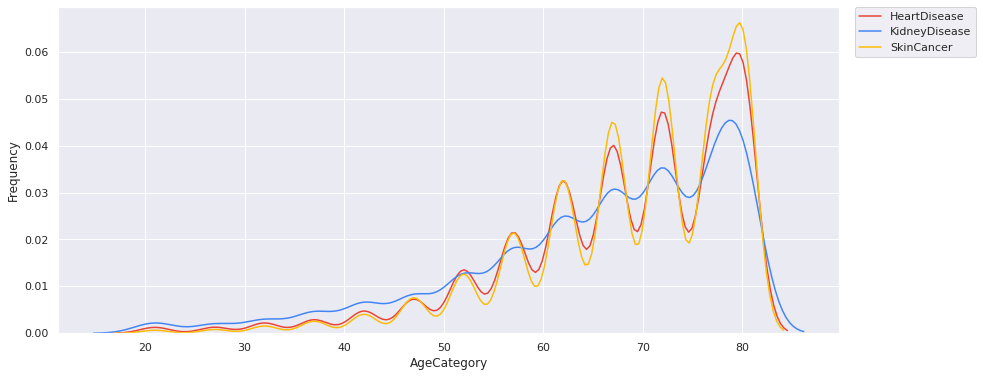

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

MODEL BUILDING

In [ ]:
#bin the BMI into different categories to handle the Outliers and improve the Interpretability
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [ ]:
df['BMICategory'].value_counts()

Overweight (25.0 <= BMI < 30.0)       114355
Normal weight (18.5 <= BMI < 25.0)     97778
Obese (30.0 <= BMI < 35.0)             61169
Extremly Obese (BMI >= 35.0)           41379
Underweight (BMI < 18.5)                5114
Name: BMICategory, dtype: int64

ENCODING the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  object  
 1   Smoking           319795 non-null  object  
 2   AlcoholDrinking   319795 non-null  object  
 3   Stroke            319795 non-null  object  
 4   PhysicalHealth    319795 non-null  float64 
 5   MentalHealth      319795 non-null  float64 
 6   DiffWalking       319795 non-null  object  
 7   Sex               319795 non-null  object  
 8   AgeCategory       319795 non-null  object  
 9   Race              319795 non-null  object  
 10  Diabetic          319795 non-null  object  
 11  PhysicalActivity  319795 non-null  object  
 12  GenHealth         319795 non-null  object  
 13  SleepTime         319795 non-null  float64 
 14  Asthma            319795 non-null  object  
 15  KidneyDisease     319795 non-null  object  
 16  Sk

In [ ]:
# Define the columns to be label encoded
order_cols = ["BMICategory", "AgeCategory", "HeartDisease"]

# Define the columns to be one-hot encoded
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding on columns specified in order_cols
for col in order_cols:
    # Instantiate a LabelEncoder object and fit it to the column
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

# One-hot encoding on columns specified in no_order_cols
for col in no_order_cols:
    # Use pd.get_dummies to create dummy variables for the column
    dummy_col = pd.get_dummies(df[col], prefix=col)
    # Concatenate the new dummy columns to the original DataFrame
    df = pd.concat([df, dummy_col], axis=1)
    # Remove the original column from the DataFrame to avoid multicollinearity
    del df[col]


In [ ]:
#the data is highly imbalanced
len(df[(df['HeartDisease']==1)])/len(df[(df['HeartDisease']==0)])

0.09360786808106093

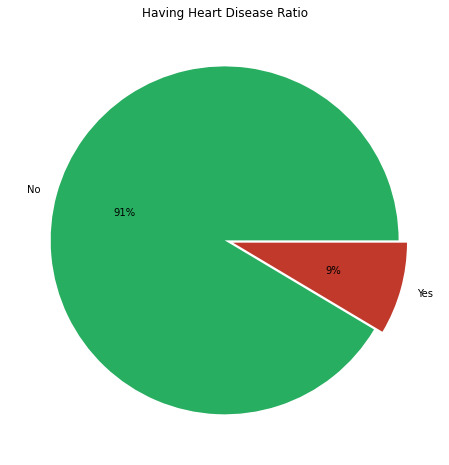

In [ ]:
#Visualization of having heart disease to not having heart disease
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having Heart Disease Ratio')
fig.show()

We can clearly see that the data is highly imbalanced with 91 to 9 ratio

In [ ]:
#Split the response and predictors to different dataframes
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [ ]:
#Using SMOTE for imbalanced data sets to convert to balanced data
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2022, stratify=Y)

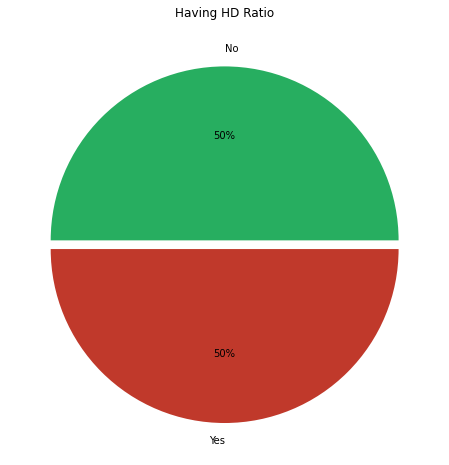

In [ ]:
#Visualization for balanced data
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(Y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import all the required models 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

#iterating through models 
models = {
    "DT":DecisionTreeClassifier(random_state = 2022, max_depth=15),
    "Logistic": LogisticRegression(random_state = 2022),
    "SGD": SGDClassifier(random_state = 2022),
    "RF":RandomForestClassifier(random_state = 2022, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=2022),
    "XGB":XGBClassifier(random_state=2022)
}
#store the results in results dataframe
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score', 'AUC-ROC'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(8, 6))
        y_pred = fit.predict(X_test)
        ax.set_title(model)
        metrics.ConfusionMatrixDisplay.from_estimator(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        auc_roc = roc_auc_score(y_test, y_pred)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1, auc_roc]

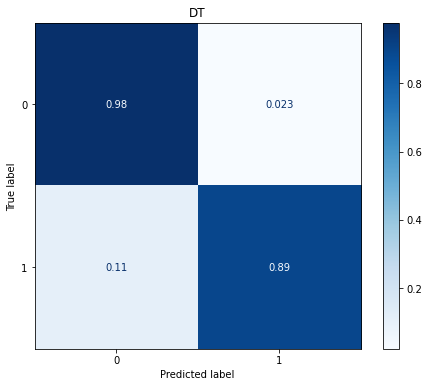

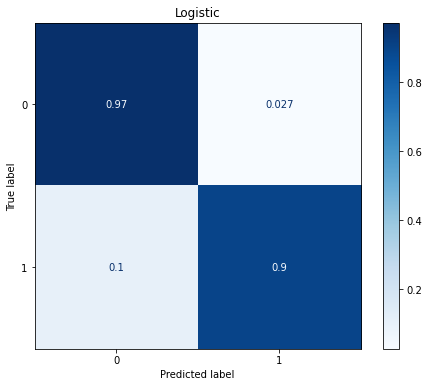

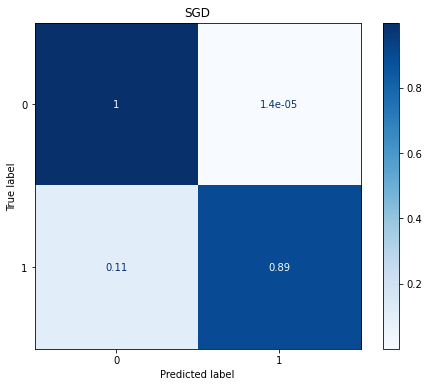

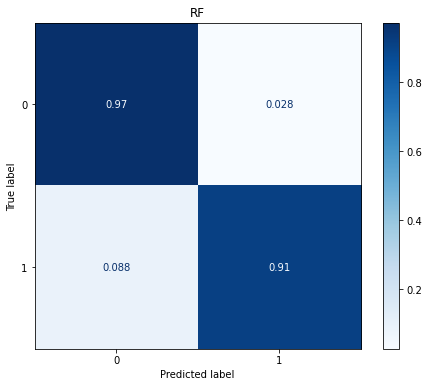

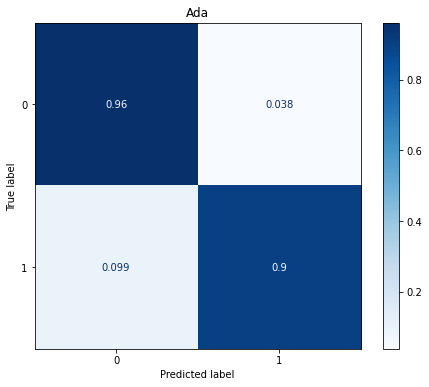

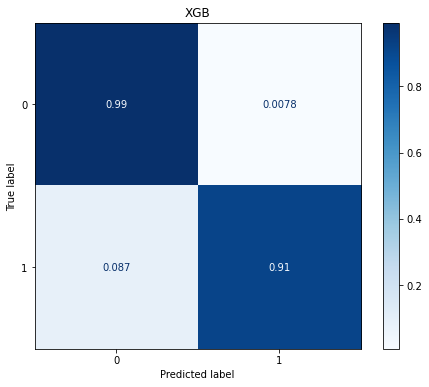

In [ ]:
test_models(X_train, X_test, y_train, y_test)

In [ ]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score,AUC-ROC
0,DT,0.944,0.934,89.18,97.48,93.15,0.934376
1,Logistic,0.935,0.935,89.82,97.05,93.29,0.935443
2,SGD,0.945,0.947,89.31,100.00,94.35,0.946537
3,RF,0.948,0.942,91.21,97.00,94.01,0.941933
4,Ada,0.931,0.932,90.09,95.99,92.95,0.931620
5,XGB,0.954,0.953,91.29,99.15,95.06,0.952562


In [ ]:
#Calculating true positive and false positive rates to draw the ROC curve and calcuate the AUC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc

model1 = DecisionTreeClassifier(random_state = 2022, max_depth=15)
model1.fit(X_train, y_train)
y_pred_prob1 = model1.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

model2 = LogisticRegression(random_state = 2022)
model2.fit(X_train, y_train)
y_pred_prob2 = model2.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

model3 = SGDClassifier(loss='hinge',random_state = 2022)
model3.fit(X_train, y_train)
calibrator = CalibratedClassifierCV(model3, cv='prefit')
model = calibrator.fit(X_train, y_train)
y_pred_prob3 = model.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)

model4 = RandomForestClassifier(random_state = 2022, max_depth=15)
model4.fit(X_train, y_train)
y_pred_prob4 = model4.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
roc_auc4 = auc(fpr4, tpr4)

model5 = AdaBoostClassifier(random_state=2022)
model5.fit(X_train, y_train)
y_pred_prob5 = model5.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)
roc_auc5 = auc(fpr5, tpr5)

model6 = XGBClassifier(random_state=2022)
model6.fit(X_train, y_train)
y_pred_prob6 = model6.predict_proba(X_test)[:, 1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)
roc_auc6 = auc(fpr6, tpr6)

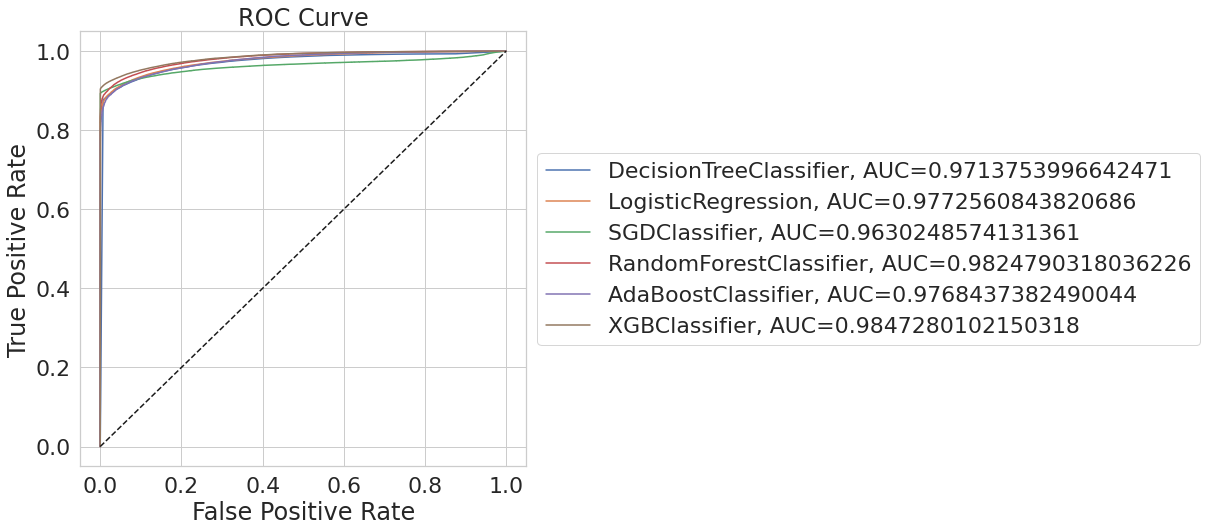

In [ ]:
#Plotting ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='DecisionTreeClassifier, AUC='+str(roc_auc1))
plt.plot(fpr2, tpr2, label='LogisticRegression, AUC='+str(roc_auc2))
plt.plot(fpr3, tpr3, label='SGDClassifier, AUC='+str(roc_auc3))
plt.plot(fpr4, tpr4, label='RandomForestClassifier, AUC='+str(roc_auc4))
plt.plot(fpr5, tpr5, label='AdaBoostClassifier, AUC='+str(roc_auc5))
plt.plot(fpr6, tpr6, label='XGBClassifier, AUC='+str(roc_auc6))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

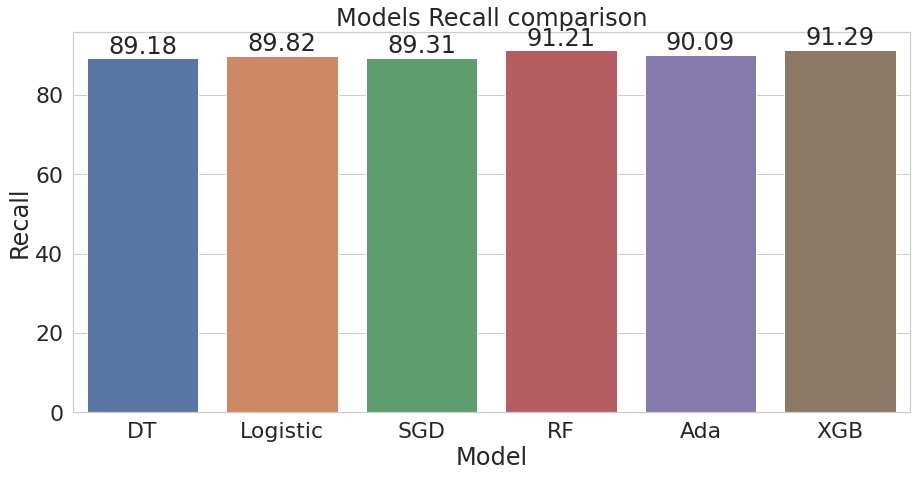

In [ ]:
#Comparing Recall of all the models
plt.figure(figsize=(15, 7))
sns.set_theme(style="whitegrid", font_scale=2)
ax = sns.barplot(x='Model', y="Recall", data=results)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Recall comparison')
fig.show()

**Precision displays the algorithm's capacity to identify this class from other classes, whereas recall demonstrates the algorithm's overall capacity to detect a specific class. The method with the highest recall should be used to solve the problem.**

**Finalizing the Model from above Models**

In [ ]:

def fit_model_result(x_train, x_test, y_train, y_test, model):
    # Modelling
    reg = model
    reg.fit(x_train,y_train)
    
    # Getting evaluation results
    y_pred = reg.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=5, output_dict=True)
    recall = round(report['weighted avg']['recall']*100, 2)
    precision = round(report['weighted avg']['precision']*100, 2)
    f1 = round(report['weighted avg']['f1-score']*100,2)
    test_score = round(report['accuracy']*100,2)
    train_score = round(reg.score(x_train,y_train)*100,2)
    
    # Printing results
#     results.loc[len(results.index)] = [train_score, test_score, recall, precision, f1]
    print(metrics.classification_report(y_test, y_pred, digits=5))
    
    # Displaying confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    metrics.plot_confusion_matrix(reg, x_test, y_test, cmap='Blues', normalize='true',ax=ax, display_labels=['No HD','HD'])
    plt.show()

              precision    recall  f1-score   support

           0    0.91920   0.99226   0.95433     73105
           1    0.99159   0.91278   0.95056     73106

    accuracy                        0.95252    146211
   macro avg    0.95540   0.95252   0.95245    146211
weighted avg    0.95540   0.95252   0.95245    146211



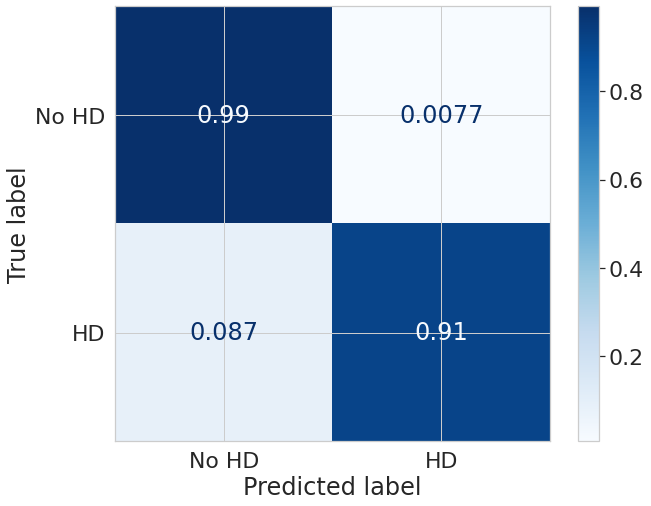

In [ ]:
fit_model_result(X_train, X_test, y_train, y_test,XGBClassifier(random_state=2022))

XGB booster is having better performance over other models for the heart disease prediction dataset.